In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200)

In [3]:
data=np.load("./data/250_50_sdf_based_collision.npz")

In [4]:
sdf = np.load("./data/obstacles_1_sdf.npz")
sdf = sdf['sdf'].squeeze()

In [5]:
u = data['actions']
tail = data['states'][:, :, 0:2]
mid = data['states'][:, :, 2:4]
head = data['states'][:, :, 4:6]
constraints = data['constraints']

In [6]:
mid_to_tail = tail - mid
head_to_mid = head - mid
theta1 = np.arctan2(mid_to_tail[:, :, 1], mid_to_tail[:, :, 0]).flatten()
theta2 = np.arctan2(head_to_mid[:, :, 1], head_to_mid[:, :, 0]).flatten()
head_x = head[:, :, 0].flatten()
head_y = head[:, :, 1].flatten()

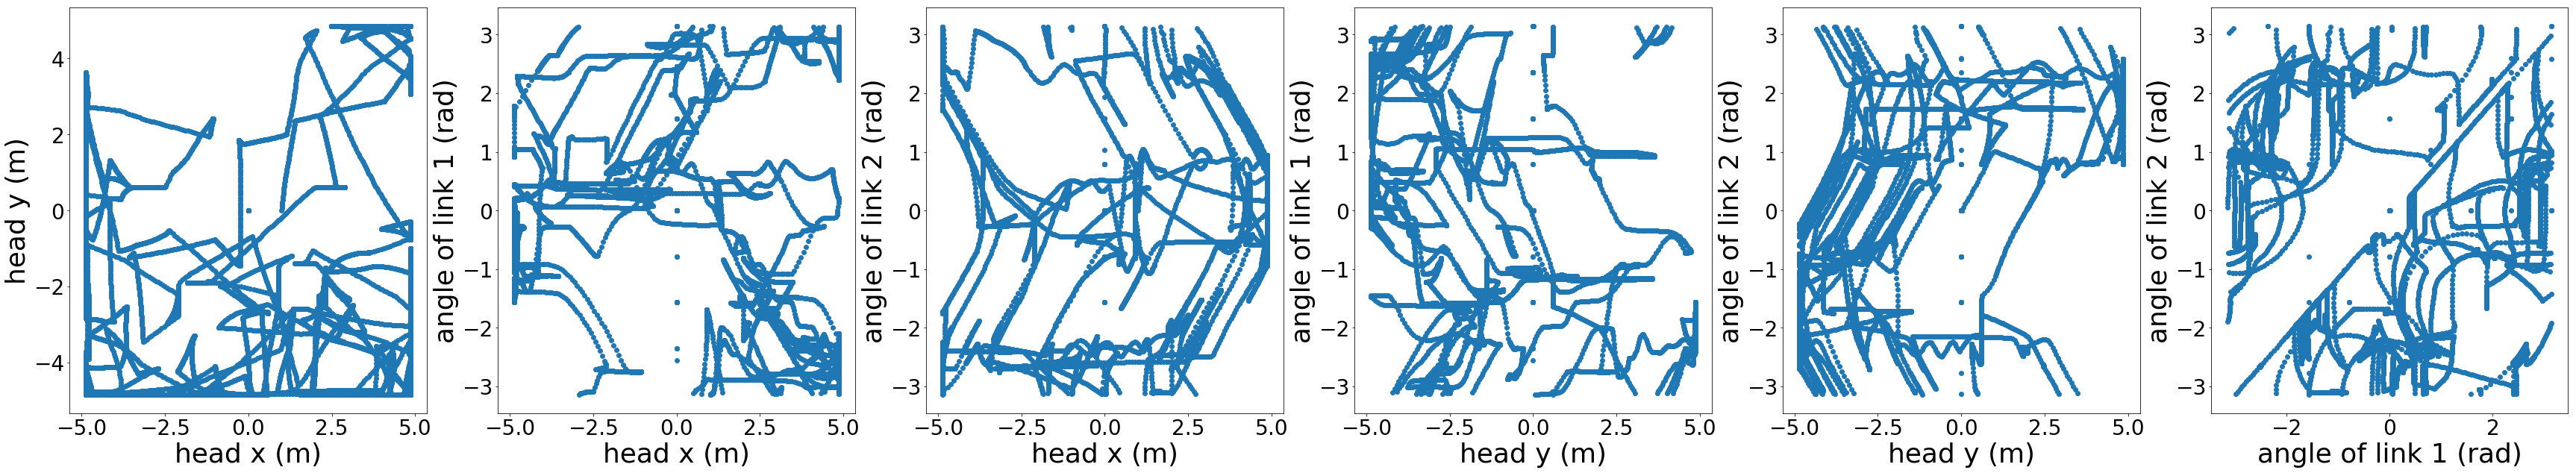

In [12]:
fig, axes = plt.subplots(1, 6, figsize=(60,10))
plt.style.use("paper")
axes[0].scatter(head_x, head_y)
axes[0].set_xlabel("head x (m)")
axes[0].set_ylabel("head y (m)")

axes[1].scatter(head_x, theta1)
axes[1].set_xlabel("head x (m)")
axes[1].set_ylabel("angle of link 1 (rad)")

axes[2].scatter(head_x, theta2)
axes[2].set_xlabel("head x (m)")
axes[2].set_ylabel("angle of link 2 (rad)")

axes[3].scatter(head_y, theta1)
axes[3].set_xlabel("head y (m)")
axes[3].set_ylabel("angle of link 1 (rad)")

axes[4].scatter(head_y, theta2)
axes[4].set_xlabel("head y (m)")
axes[4].set_ylabel("angle of link 2 (rad)")

axes[5].scatter(theta1, theta2)
axes[5].set_xlabel("angle of link 1 (rad)")
axes[5].set_ylabel("angle of link 2 (rad)");

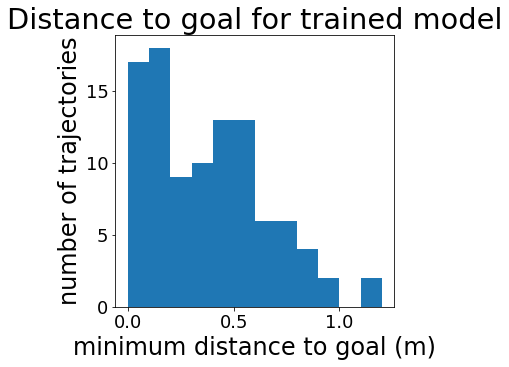

In [62]:
def parse_eval_file(filename):
    lines = open(filename, 'r').readlines()
    array_lines = []
    reading_array = False
    for line in lines:
        if "min costs" in line:
            reading_array = True
            array_lines.append(line[12:].strip("\n"))
        elif reading_array:
            if "]" in line:
                array_lines.append(line[:-2].strip("\n"))
                break
            array_lines.append(line.strip("\n"))
            
    min_costs = []
    for s in "".join(array_lines).split(" "):
        try:
            min_costs.append(float(s))
        except ValueError:
            pass
        
    min_costs = np.array(min_costs)
    plt.figure(figsize=(5,5))
    plt.title("Distance to goal for trained model")
    plt.hist(min_costs, bins=np.arange(0, 1.3, 0.1))
    plt.xlabel("minimum distance to goal (m)")
    plt.ylabel("number of trajectories")
    
parse_eval_file("log_data/sdf_based_constraint/April_25_17-00-41__3d9d86ea33/eval_1556229126.txt")